## Personal Project

# Analisa Penduduk 15 Tahun Ke Atas yang Bekerja menurut Lapangan Pekerjaan Utama 2020-2025

##### Source https://www.bps.go.id/id/statistics-table/1/OTcwIzE=/penduduk-15-tahun-ke-atas-yang-bekerja-menurut-lapangan-pekerjaan-utama-1986---2024.html

In [1]:
# Import CSV
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\User\OneDrive\Documents\Kuliah\Data Analyst Project 2\penduduk-15-tahun-ke-atas-yang-bekerja-menurut-lapangan-pekerjaan-utama-2020-2024(bpsfile2).csv", delimiter=";", encoding="utf-8")

C:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Data Cleaning

In [2]:
# Remove NaN Values
df = df.dropna(how="all")
df = df.dropna(axis=1)
df

,Lapangan Pekerjaan Utama,2020 Februari,2020 Agustus,2021 Februari,2021 Agustus,2022 Februari,2022 Agustus,2023 Februari,2023 Agustus,2024 Februari,2024 Agustus
0,"Pertanian, Kehutanan dan Perikanan",38956801.0,38224371.0,38777600.0,37130676.0,40635997.0,38703996.0,40694572.0,39451238.0,40720959.0,40757151.0
1,Pertambangan dan Penggalian,1342568.0,1352236.0,1348217.0,1443422.0,1587978.0,1530157.0,1696911.0,1662488.0,1702556.0,1733523.0
2,Industri Pengolahan,18709441.0,17482849.0,17823568.0,18694463.0,18671926.0,19172397.0,18829997.0,19343332.0,18880391.0,20010758.0
3,"Pengadaan Listrik, Gas, Uap/Air Panas dan Udar...",343830.0,303551.0,274622.0,284518.0,309484.0,311124.0,357148.0,322629.0,360997.0,355280.0
4,"Pengadaan Air, Pengelolaan Sampah dan Daur Ula...",463359.0,490984.0,498535.0,562726.0,534247.0,511150.0,568604.0,493076.0,575441.0,556713.0
5,Konstruksi,8116426.0,8066497.0,7929651.0,8293769.0,8188425.0,8481349.0,8605748.0,9251821.0,8645266.0,9470763.0
6,Perdagangan Besar Dan Eceran; Reparasi dan Per...,24773768.0,24702695.0,25161613.0,25736110.0,25800553.0,26193890.0,2623881.0,26552658.0,27085695.0,27328692.0
7,Transportasi dan Pergudangan,5509153.0,5591941.0,5307649.0,5443654.0,5710510.0,5805308.0,5835171.0,6147477.0,5900351.0,6199637.0
8,Penyediaan Akomodasi dan Penyediaan Makan Minum,9059188.0,8543794.0,9167542.0,9180340.0,9635433.0,9607709.0,10146818.0,10785255.0,11108827.0,11270801.0
9,Informasi dan Komunikasi,962935.0,933273.0,1083471.0,998199.0,1097558.0,1009091.0,1192482.0,989872.0,1230780.0,1026529.0


In [3]:
# filling Incorrect data, so it wont become an outlier
## Apparently There's 2 incorrect data in februari 2023
df.loc[df["Lapangan Pekerjaan Utama"] == "Perdagangan Besar Dan Eceran; Reparasi dan Perawatan Mobil dan Sepeda Motor", "2023 Februari"] = 26238810
df.loc[df["Lapangan Pekerjaan Utama"] == "Jasa Pendidikan", "2023 Februari"] = 6736070

In [4]:
# Check basic info
print(df.info())  # Check data types and missing values
print(df.head())  # Preview first few rows


<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Lapangan Pekerjaan Utama  18 non-null     object 
 1   2020 Februari             18 non-null     float64
 2   2020 Agustus              18 non-null     float64
 3   2021 Februari             18 non-null     float64
 4   2021 Agustus              18 non-null     float64
 5   2022 Februari             18 non-null     float64
 6   2022 Agustus              18 non-null     float64
 7   2023 Februari             18 non-null     float64
 8   2023 Agustus              18 non-null     float64
 9   2024 Februari             18 non-null     float64
 10  2024 Agustus              18 non-null     float64
dtypes: float64(10), object(1)
memory usage: 1.7+ KB
None
                            Lapangan Pekerjaan Utama  2020 Februari  \
0                 Pertanian, Kehutanan dan Perikanan     3

In [5]:
# df.iloc[:, 1:] = df.iloc[:, 1:].astype(int)
# Convert all columns except the first one (Lapangan Pekerjaan Utama) to numeric
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # Convert non-numeric to NaN
    df[col] = df[col].fillna(0).astype(int)  # Replace NaN with 0 and convert to int

# Save the cleaned dataset
df.to_csv("cleaned_data_integer.csv", index=False)

# Check result
print(df.dtypes)
print(df.head())

Lapangan Pekerjaan Utama    object
2020 Februari                int32
2020 Agustus                 int32
2021 Februari                int32
2021 Agustus                 int32
2022 Februari                int32
2022 Agustus                 int32
2023 Februari                int32
2023 Agustus                 int32
2024 Februari                int32
2024 Agustus                 int32
dtype: object
                            Lapangan Pekerjaan Utama  2020 Februari  \
0                 Pertanian, Kehutanan dan Perikanan       38956801   
1                        Pertambangan dan Penggalian        1342568   
2                                Industri Pengolahan       18709441   
3  Pengadaan Listrik, Gas, Uap/Air Panas dan Udar...         343830   
4  Pengadaan Air, Pengelolaan Sampah dan Daur Ula...         463359   

   2020 Agustus  2021 Februari  2021 Agustus  2022 Februari  2022 Agustus  \
0      38224371       38777600      37130676       40635997      38703996   
1       1352236     

## Data Analysis

### Jumlah Lapangan Kerja di Indonesia Tiap Tahun

In [6]:
total_employment = df.iloc[:, 1:].sum()

print(total_employment)


2020 Februari    266585732
2020 Agustus     256908368
2021 Februari    262128610
2021 Agustus     262101046
2022 Februari    271223790
2022 Agustus     270593426
2023 Februari    277265010
2023 Agustus     279704754
2024 Februari    284358092
2024 Agustus     289284008
dtype: int64


### Tren Jumlah Pekerjaan dari 2020-2024

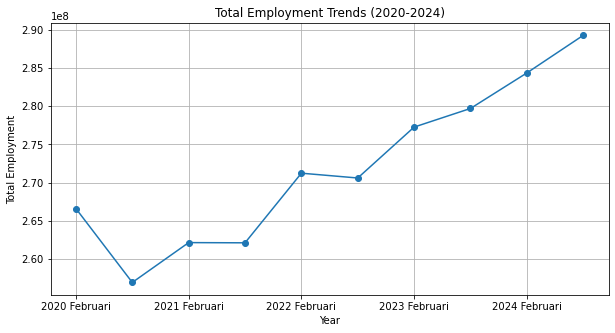

In [7]:
plt.figure(figsize=(10, 5))
total_employment.plot(marker="o")
plt.title("Total Employment Trends (2020-2024)")
plt.xlabel("Year")
plt.ylabel("Total Employment")
plt.grid(True)
plt.show()

### 5 Sektor Tertinggi

Lapangan Pekerjaan Utama
Pertanian, Kehutanan dan Perikanan                                             394053361
Perdagangan Besar Dan Eceran; Reparasi dan Perawatan Mobil dan Sepeda Motor    259574484
Industri Pengolahan                                                            187619122
Penyediaan Akomodasi dan Penyediaan Makan Minum                                 98505707
Konstruksi                                                                      85049715
dtype: int64


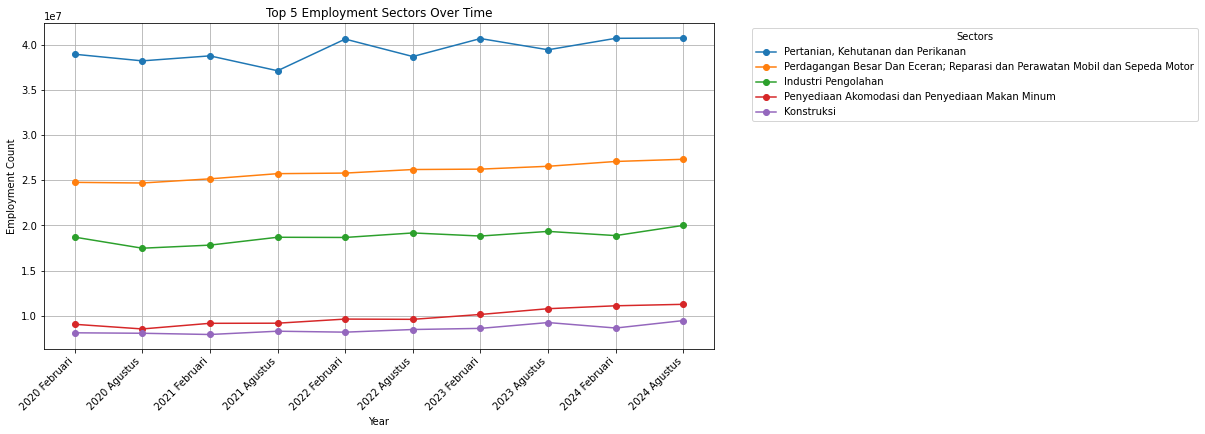

In [8]:
# Remove 'Total' rows
df_filtered = df[~df["Lapangan Pekerjaan Utama"].str.contains("Total", case=False, na=False)]

# Convert employment data to numeric values, ensuring correct indexing
df_numeric = df_filtered.set_index("Lapangan Pekerjaan Utama").apply(pd.to_numeric, errors="coerce")

# Get only the columns that contain year data
year_columns = [col for col in df_numeric.columns if any(char.isdigit() for char in col)]
df_selected = df_numeric[year_columns]  # Ensure only numeric year columns are used

# Find the Top 5 Sectors based on their total employment across all years
top_sectors = df_selected.sum(axis=1).nlargest(5)
print(top_sectors)

# Plot each sector as a line
plt.figure(figsize=(12, 6))
for sector in top_sectors.index:  # Use correct index reference
    plt.plot(df_selected.columns.to_numpy(), df_selected.loc[sector].to_numpy(), marker="o", label=sector)

# Formatting
plt.title("Top 5 Employment Sectors Over Time")
plt.xlabel("Year")
plt.ylabel("Employment Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sectors", bbox_to_anchor=(1.05, 1), loc="upper left",fontsize="medium")
plt.grid(True)
plt.show()


## Laju Pertumbuhan Pekerjaan 2020-2024

2020 Februari    0.000000
2020 Agustus    -3.630113
2021 Februari    2.031947
2021 Agustus    -0.010515
2022 Februari    3.480621
2022 Agustus    -0.232415
2023 Februari    2.465538
2023 Agustus     0.879932
2024 Februari    1.663661
2024 Agustus     1.732293
dtype: float64


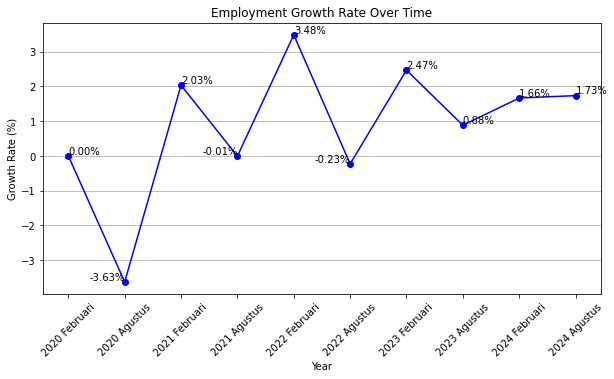

In [14]:
# Select only year columns
years = [col for col in df.columns if any(str(y) in col for y in range(2020, 2025))]

# Calculate percentage change year-over-year
growth_rate = df[years].sum().pct_change() * 100
growth_rate = growth_rate.fillna(0)
print(growth_rate)

plt.figure(figsize=(10, 5))
plt.plot(growth_rate, marker='o', linestyle='-', color='b')
plt.title("Employment Growth Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')
for i, txt in enumerate(growth_rate.values):
    plt.text(growth_rate.index[i], growth_rate.values[i], f"{txt:.2f}%", 
             ha='right' if txt < 0 else 'left', va='bottom', fontsize=10, color='black')
# Show the plot
plt.show()

### 5 Pekerjaan dengan Volatilitas Tertinggi

Lapangan Pekerjaan Utama
Pertanian, Kehutanan dan Perikanan                                             1.264599e+06
Penyediaan Akomodasi dan Penyediaan Makan Minum                                9.378827e+05
Perdagangan Besar Dan Eceran; Reparasi dan Perawatan Mobil dan Sepeda Motor    9.021615e+05
Industri Pengolahan                                                            7.162191e+05
Konstruksi                                                                     5.098979e+05
dtype: float64


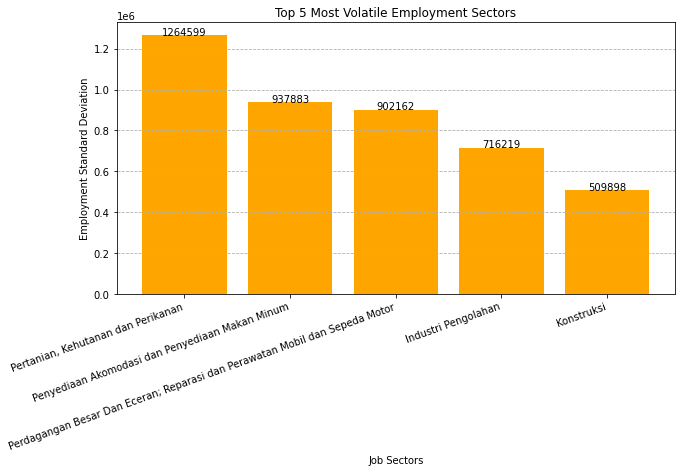

In [10]:
# Calculate standard deviation of employment for each sector
df_filtered = df[~df["Lapangan Pekerjaan Utama"].str.contains("Total", case=False, na=False)]
volatility = df_filtered.set_index("Lapangan Pekerjaan Utama").std(axis=1).nlargest(5)

print(volatility)

plt.figure(figsize=(10, 5))
plt.bar(volatility.index, volatility.values, color='orange')

# Add labels to bars
for i, txt in enumerate(volatility.values):
    plt.text(i, txt, f"{txt:.0f}", ha='center', fontsize=10, color='black')

# Add title and labels
plt.title("Top 5 Most Volatile Employment Sectors")
plt.xlabel("Job Sectors")
plt.ylabel("Employment Standard Deviation")
plt.xticks(rotation=20, ha='right')
plt.grid(axis='y', linestyle='--')

# Show plot
plt.show()

### Korelasi antar Lapangan Pekerjaan

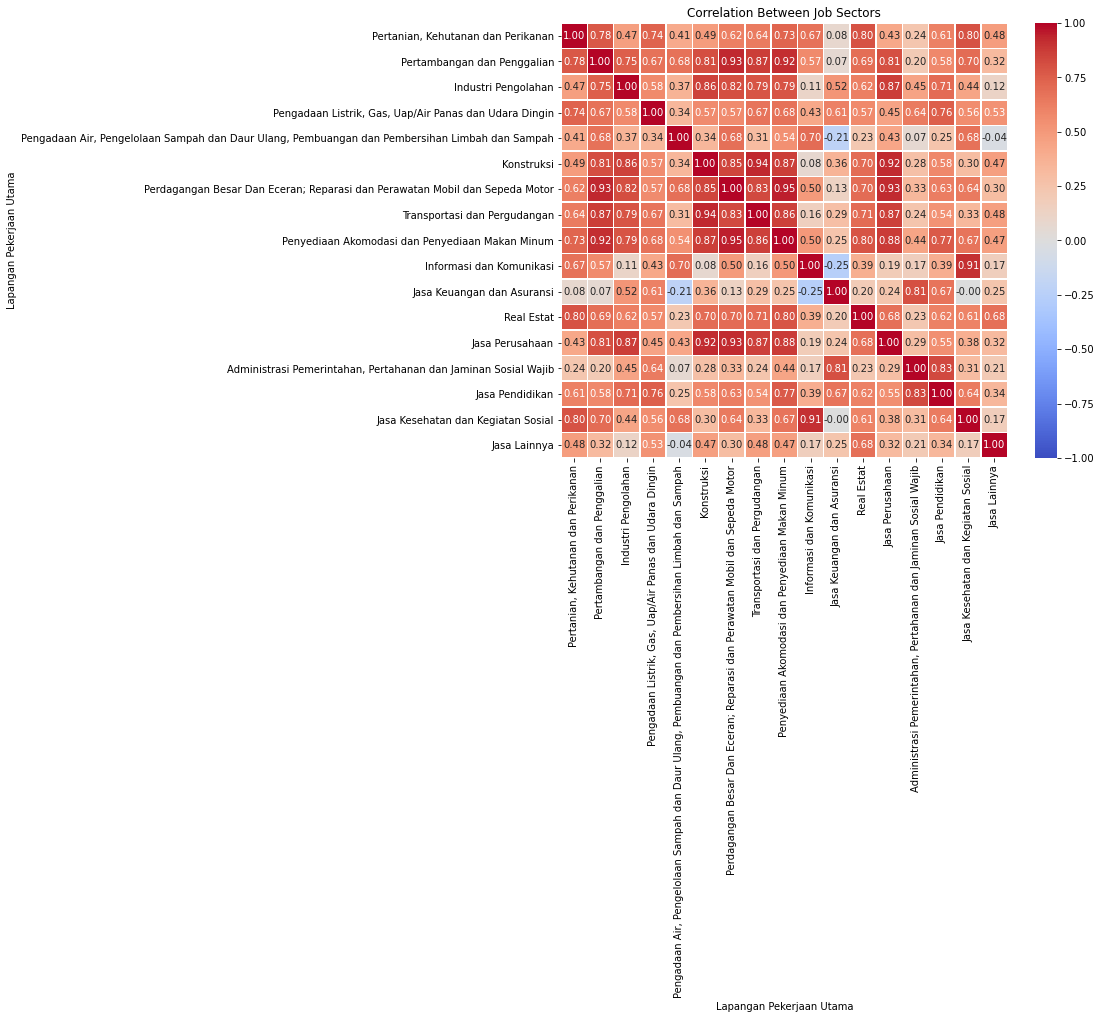

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove 'Total' and set index to job sector names
df_filtered = df[~df["Lapangan Pekerjaan Utama"].str.contains("Total", case=False, na=False)]

# Convert numeric columns to numbers
df_numeric = df_filtered.set_index("Lapangan Pekerjaan Utama").apply(pd.to_numeric, errors="coerce")

# Compute correlation matrix
corr = df_numeric.T.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Add title
plt.title("Correlation Between Job Sectors")

plt.show()


### Prediksi Tren Lapangan Pekerjaan Tertinggi (Pertanian, Kehutanan dan Perikanan) Menggunakan Regresi

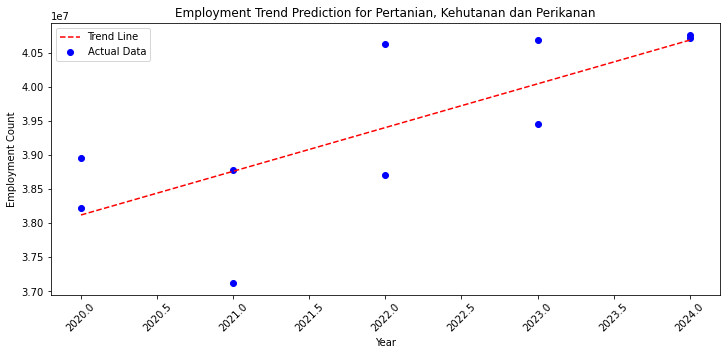

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Remove 'Total' and set index
df_filtered = df[~df["Lapangan Pekerjaan Utama"].str.contains("Total", case=False, na=False)]
df_numeric = df_filtered.set_index("Lapangan Pekerjaan Utama").apply(pd.to_numeric, errors="coerce")

# Choose a sector (example: Manufacturing)
sector = "Pertanian, Kehutanan dan Perikanan"
y = df_numeric.loc[sector].dropna()  # Employment numbers
X = np.array([int(col[:4]) for col in y.index]).reshape(-1, 1)  # Extract years from column names

# Train linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot results
plt.figure(figsize=(12, 5))
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, y_pred, color='red', linestyle='dashed', label="Trend Line")
plt.title(f"Employment Trend Prediction for {sector}")
plt.xlabel("Year")
plt.ylabel("Employment Count")
plt.xticks(rotation=45)  # Ensure years are readable
plt.legend()
plt.show()


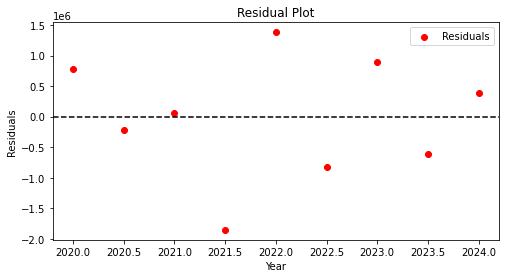

In [13]:
years = np.array([2020.0 ,2020.5, 2021.0 ,2021.5, 2022.0 ,2022.5 , 2023.0 ,2023.5, 2024.0]).reshape(-1, 1)  # Independent variable
employment = np.array([38956801, 38224371, 38777600, 37130676, 40635997,38703996,40694572,39451238,40720959])  # Dependent variable

# Train the Linear Regression Model
model = LinearRegression()
model.fit(years, employment)

# Make Predictions
predicted = model.predict(years)

# Compute Residuals
residuals = employment - predicted
plt.figure(figsize=(8, 4))
plt.scatter(years, residuals, color="red", label="Residuals")
plt.axhline(y=0, color="black", linestyle="--")  # Zero residual line
plt.xlabel("Year")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()